# Secondary Data Exploration
## Adam Kaba

In this notebook I'll be importing and combining data for my project. I aim to look at effects of population and income on olympics performance. As well as the interaction between the two.
I was unable to include more/ more detailed maps due to the memory limits of jupyter notebook. So I tried to keep the ones that showed the general idea.

### Import
First step is importing the libraries:

In [2]:
import pandas as pd
import geopandas as gpd
import contextily as ctx
import matplotlib.pyplot as plt

### Loading data

First load in the olympics data and merge it with the metadata

In [3]:
olympics = pd.read_csv("athlete_events.csv")
regions = pd.read_csv("noc_regions.csv")
olympics = pd.merge(olympics,regions, on = "NOC")
del regions
print(olympics.shape)
olympics.head()

(270767, 17)


,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal,region,notes
0,1,A Dijiang,M,24.0,180.0,80.0,China,CHN,1992 Summer,1992,Summer,Barcelona,Basketball,Basketball Men's Basketball,NaN,China,NaN
1,2,A Lamusi,M,23.0,170.0,60.0,China,CHN,2012 Summer,2012,Summer,London,Judo,Judo Men's Extra-Lightweight,NaN,China,NaN
2,602,Abudoureheman,M,22.0,182.0,75.0,China,CHN,2000 Summer,2000,Summer,Sydney,Boxing,Boxing Men's Middleweight,NaN,China,NaN
3,1463,Ai Linuer,M,25.0,160.0,62.0,China,CHN,2004 Summer,2004,Summer,Athina,Wrestling,"Wrestling Men's Lightweight, Greco-Roman",NaN,China,NaN
4,1464,Ai Yanhan,F,14.0,168.0,54.0,China,CHN,2016 Summer,2016,Summer,Rio de Janeiro,Swimming,Swimming Women's 200 metres Freestyle,NaN,China,NaN


We have information on 270,767 athletes.

Next is to import the population data and merge it with its metadata.

In [4]:
pop = pd.read_csv('API_SP.POP.TOTL_DS2_en_csv_v2_1976634.csv')
popmeta = pd.read_csv("Metadata_Country_API_SP.POP.TOTL_DS2_en_csv_v2_1976634.csv")
pop = pd.merge(pop,popmeta, on= "Country Code")
del popmeta
print(pop.shape)
pop.head()

(263, 70)


,Country Name,Country Code,Indicator Name,Indicator Code,1960,1961,1962,1963,1964,1965,...,2016,2017,2018,2019,2020,Region,IncomeGroup,SpecialNotes,TableName,Unnamed: 5
0,Aruba,ABW,"Population, total",SP.POP.TOTL,54211.0,55438.0,56225.0,56695.0,57032.0,57360.0,...,104872.0,105366.0,105845.0,106314.0,NaN,Latin America & Caribbean,High income,NaN,Aruba,NaN
1,Afghanistan,AFG,"Population, total",SP.POP.TOTL,8996973.0,9169410.0,9351441.0,9543205.0,9744781.0,9956320.0,...,35383128.0,36296400.0,37172386.0,38041754.0,NaN,South Asia,Low income,NaN,Afghanistan,NaN
2,Angola,AGO,"Population, total",SP.POP.TOTL,5454933.0,5531472.0,5608539.0,5679458.0,5735044.0,5770570.0,...,28842484.0,29816748.0,30809762.0,31825295.0,NaN,Sub-Saharan Africa,Lower middle income,NaN,Angola,NaN
3,Albania,ALB,"Population, total",SP.POP.TOTL,1608800.0,1659800.0,1711319.0,1762621.0,1814135.0,1864791.0,...,2876101.0,2873457.0,2866376.0,2854191.0,NaN,Europe & Central Asia,Upper middle income,NaN,Albania,NaN
4,Andorra,AND,"Population, total",SP.POP.TOTL,13411.0,14375.0,15370.0,16412.0,17469.0,18549.0,...,77297.0,77001.0,77006.0,77142.0,NaN,Europe & Central Asia,High income,NaN,Andorra,NaN


This is the population data of each country from 1960 to 2018.

Now we want to combine both of these datasets into 1. I'm changing region into country name and using that as the merge column as it results in the least amount of data loss

In [5]:
olympics = olympics.rename(columns = {"region": "Country Name" })
olympics = pd.merge(olympics,pop, on = "Country Name")
del pop
print(olympics.shape)
olympics.head()

(214266, 86)


,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,...,2016,2017,2018,2019,2020,Region,IncomeGroup,SpecialNotes,TableName,Unnamed: 5
0,1,A Dijiang,M,24.0,180.0,80.0,China,CHN,1992 Summer,1992,...,1.378665e+09,1.386395e+09,1.392730e+09,1.397715e+09,NaN,East Asia & Pacific,Upper middle income,On 1 July 1997 China resumed its exercise of s...,China,NaN
1,2,A Lamusi,M,23.0,170.0,60.0,China,CHN,2012 Summer,2012,...,1.378665e+09,1.386395e+09,1.392730e+09,1.397715e+09,NaN,East Asia & Pacific,Upper middle income,On 1 July 1997 China resumed its exercise of s...,China,NaN
2,602,Abudoureheman,M,22.0,182.0,75.0,China,CHN,2000 Summer,2000,...,1.378665e+09,1.386395e+09,1.392730e+09,1.397715e+09,NaN,East Asia & Pacific,Upper middle income,On 1 July 1997 China resumed its exercise of s...,China,NaN
3,1463,Ai Linuer,M,25.0,160.0,62.0,China,CHN,2004 Summer,2004,...,1.378665e+09,1.386395e+09,1.392730e+09,1.397715e+09,NaN,East Asia & Pacific,Upper middle income,On 1 July 1997 China resumed its exercise of s...,China,NaN
4,1464,Ai Yanhan,F,14.0,168.0,54.0,China,CHN,2016 Summer,2016,...,1.378665e+09,1.386395e+09,1.392730e+09,1.397715e+09,NaN,East Asia & Pacific,Upper middle income,On 1 July 1997 China resumed its exercise of s...,China,NaN


Some Country Names and regions were not able to be matched, however which results in a smaller data frame.

It appears we lost around 60k columns, however I believe this is still fine as we still have over 200k left

Next, I'll load in the spatial data of each country in order to create a map.

This dataset is from: https://datahub.io/core/geo-countries#resource-geo-countries_zip

In [6]:
geo= gpd.read_file("countries.geojson")
print(geo.shape)
geo.head()

(255, 3)


,ADMIN,ISO_A3,geometry
0,Aruba,ABW,"POLYGON ((-69.99694 12.57758, -69.93639 12.531..."
1,Afghanistan,AFG,"POLYGON ((71.04980 38.40866, 71.05714 38.40903..."
2,Angola,AGO,"MULTIPOLYGON (((11.73752 -16.69258, 11.73851 -..."
3,Anguilla,AIA,"MULTIPOLYGON (((-63.03767 18.21296, -63.09952 ..."
4,Albania,ALB,"POLYGON ((19.74777 42.57890, 19.74601 42.57993..."


The column names are a bit weird so I'm going to rename them

In [7]:
geo = geo.rename(columns = {"ADMIN": "Country", "ISO_A3": "Country Code"})

Next we want to match the geometric data of the countries to the actual countries themselves.
I'll be doing this by merging the data frame based on Country Code as is results in the least amount of Data Loss.

Doing this gives us our final data frame!

In [8]:
df = geo.merge(olympics, on = "Country Code")
del olympics
del geo


### Exploring the data 

The next step is to explore some of the data.

In [9]:
df.shape

(214258, 88)

In [10]:
df["Medal"].unique()

array([nan, 'Bronze', 'Gold', 'Silver'], dtype=object)

In [11]:
df["IncomeGroup"].unique()

array(['High income', 'Low income', 'Lower middle income',
       'Upper middle income'], dtype=object)

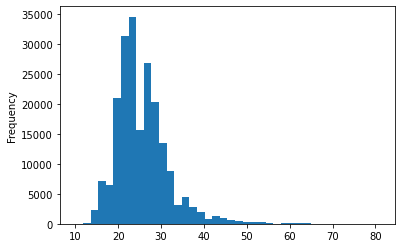

In [12]:
df["Age"].plot.hist(bins = 40)

It appears that most of the athletes competing were in their early 20's to 30's

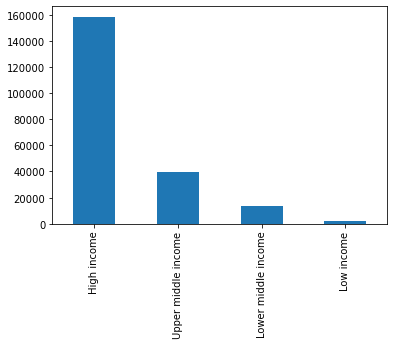

In [13]:
df["IncomeGroup"].value_counts().plot.bar()

It also appears that most athletes competing in the olympics come from a high income country.

Next, I'd like to create a variable that measures total population growth/ decline throughout the years 

In [14]:
df["Population Change"] = df["2018"]- df["1962"]

I'm also going to subset some of the data as df is very large

In [15]:
dfsmall = df[["Country Name","Medal",'Population Change', 'IncomeGroup', 'geometry']]
del df

Create a data frame of athletes who have won gold medals

In [16]:
gold = dfsmall[dfsmall["Medal"] == "Gold"]
gold.shape

(8149, 5)

It might be interesting to divide countries that have won gold medals into different income groups

['Burundi' 'Ethiopia' 'Haiti' 'Mozambique' 'Tajikistan' 'Uganda']


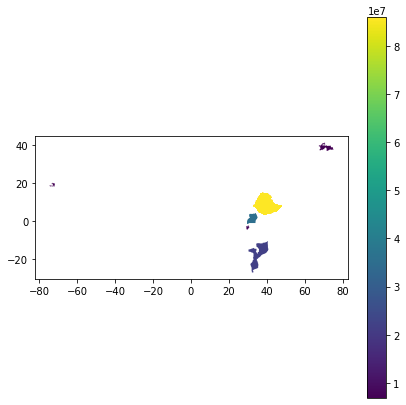

In [17]:
gold[gold['IncomeGroup'] == 'Low income'].plot(figsize = (7,7),column = "Population Change",legend = True)
print(gold['Country Name'][gold['IncomeGroup'] == 'Low income'].unique())

It appears that not many low income countries have won a gold medal, of those that have, only one country has seen tremendous population growth since the 60's. It's worth noting that most of these countries are in the Eastern World.

['Cameroon' 'Algeria' 'India' 'Kenya' 'Morocco' 'Mongolia' 'Nigeria'
 'Nepal' 'Pakistan' 'Tunisia' 'Ukraine' 'Uzbekistan' 'Vietnam' 'Zimbabwe']


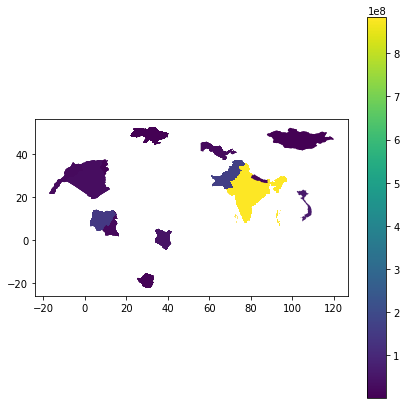

In [18]:
gold[gold['IncomeGroup'] == 'Lower middle income'].plot(figsize = (7,7),column = "Population Change",legend = True)
print(gold['Country Name'][gold['IncomeGroup'] == 'Lower middle income'].unique())

Many more lower middle income countries have won a gold medal in their history. However simillarly to low income countries, only one has seen a large amount of population growth, India.

['Argentina' 'Armenia' 'Azerbaijan' 'Bulgaria' 'Belarus' 'Brazil' 'China'
 'Colombia' 'Costa Rica' 'Cuba' 'Dominican Republic' 'Ecuador' 'Fiji'
 'Georgia' 'Grenada' 'Indonesia' 'Jamaica' 'Jordan' 'Kazakhstan' 'Mexico'
 'Peru' 'Serbia' 'Suriname' 'Thailand' 'Turkey' 'South Africa']


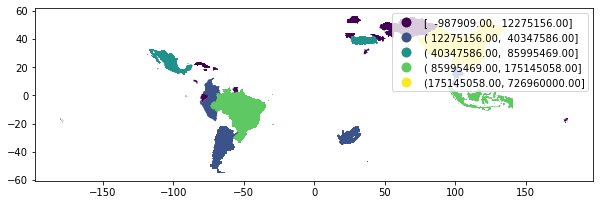

In [19]:
gold[gold['IncomeGroup'] == 'Upper middle income'].plot(figsize=(10,12), scheme='NaturalBreaks', column = "Population Change",legend = True)
print(gold['Country Name'][gold['IncomeGroup'] == 'Upper middle income'].unique())

Many more Upper middle income countries have won a gold medal at the olympics. These countries seem to have seen the most population growth on average.